<a href="https://colab.research.google.com/github/MattJCR/Diffusion_in_Colab/blob/master/Riffusion_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EASY RIFFUSION IMPLEMENTATION

*You need to configure GPU hardware accelerator to work properly*

In [1]:
!nvidia-smi

Mon Dec 26 13:30:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Setup**

In [ ]:
!git clone https://github.com/hmartiro/riffusion-inference
%cd riffusion-inference
!pip install -r requirements.txt

In [3]:
from diffusers import DiffusionPipeline
from riffusion.audio import wav_bytes_from_spectrogram_image, spectrogram_from_waveform
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from io import BytesIO
from IPython.display import Audio
import gc
import random
from google.colab import files
from scipy.io import wavfile
import numpy as np
from PIL import Image
import math

In [17]:
gc.collect()
print('Torch:',torch.__version__)

pipe = DiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1").to("cuda")

Torch: 1.13.0+cu116


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [5]:
def predict(prompt, negative_prompt,generator,steps,secs):
    secs = math.ceil(109 * secs)
    while secs%8 != 0:
      secs += 1
    spec = pipe(
        prompt,
        negative_prompt=negative_prompt,
        width=secs,
        generator=generator,
        num_inference_steps=steps
    ).images[0]
    wav = wav_bytes_from_spectrogram_image(spec)
    with open("output.wav", "wb") as f:
        f.write(wav[0].getbuffer())
    return 'output.wav', spec
def dummy(images, **kwargs): return images, False 

# **Riffusion**

seed: -16301637075


  0%|          | 0/100 [00:00<?, ?it/s]

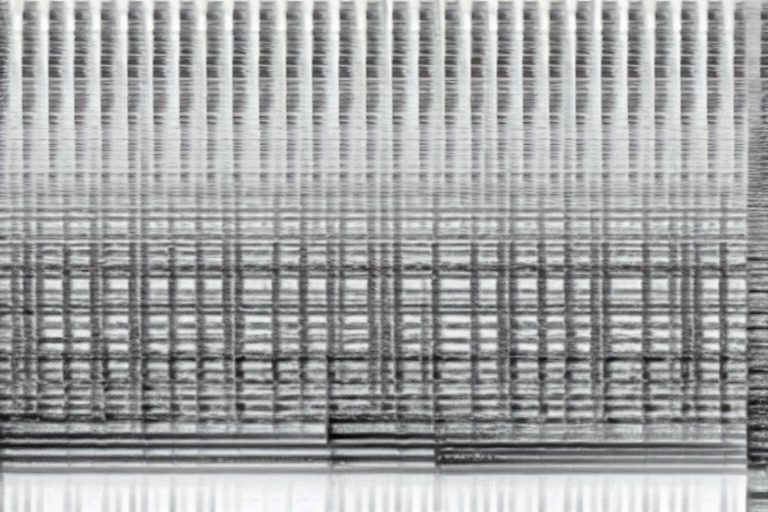

In [16]:
#@title Configuration { vertical-output: true, form-width: "50%" }

gc.collect()
steps = 100 #@param {type:"slider", min:20, max:100, step:1}
duration = 7 #@param {type:"slider", min:1, max:7, step:1}
#@markdown To make the audio track last longer than 7 seconds, you need an environment with more memory.
prompt = "house, phonk music"#@param {type:"string"}
negative_prompt = "rock, metal, progressive"#@param {type:"string"}
seed = -16301637075 #@param {type:"raw"}
enable_NSFW = True #@param {type:"boolean"}
if enable_NSFW:
  pipe.safety_checker = dummy
if seed == None:
  seed = random.randint(-99999999999,99999999999)
print('seed:',seed)
# Set the random seed for deterministic output
generator = torch.Generator("cuda").manual_seed(seed)

path, spec = predict(prompt, negative_prompt,generator,steps,duration)
display(spec)
Audio('output.wav')